In [1]:
#Importing packages
import numpy as np
import pandas as pd
import seaborn as sb
#import category_encoders as ce
import matplotlib.pyplot as plt
import pylab as pl
from pandas import ExcelFile
import xlrd
from sklearn import preprocessing
from sklearn import metrics
from imblearn.metrics import geometric_mean_score
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
#Openning Excel sheet and importing the data
"""
Open files and create the data frame from the excel sheet.
there are 24 columns and 142193 observations.
"""
#Assign spreadsheet file name to 'file'.
file = 'WeatherAUS-Final-PCA.xlsx'

#Load spreadsheet.
Excel_File = pd.ExcelFile (file)
print "The file name is :", file
print "The sheet's name is:", "Data"

#Load a sheet into a dataframe by name Data:
Data = Excel_File.parse('Data')
print "The matrix size is:", np.shape (Data)
print "The file has:", np.size (Data), "data points."
print "*******************************************"

#Data
X = Data.drop('label', axis=1)  
y = Data['label']
print X.head()
print y.head()

The file name is : WeatherAUS-Final-PCA.xlsx
The sheet's name is: Data
The matrix size is: (142193, 9)
The file has: 1279737 data points.
*******************************************
         P1        P2        P3        P4        P5        P6        P7  \
0  1.329162  1.089773  0.154372  1.386960 -0.077080  0.717266  0.698151   
1  1.201544 -0.165625  0.510448  2.212495 -0.873853 -0.776803  0.007917   
2  2.188099  0.833814  0.844096  1.261486  0.215900 -0.702896  0.469526   
3  0.827603 -2.096686  0.795512  1.560439  0.562138  0.032131  0.468624   
4  1.975079 -0.412035 -1.132834  0.913044 -1.073298  0.954810  0.153818   

         P8  
0 -0.844924  
1  0.085203  
2 -0.209797  
3  0.029683  
4 -0.279111  
0   -1
1   -1
2   -1
3   -1
4   -1
Name: label, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)
X_sm = pd.DataFrame(X_sm)
y_sm = pd.DataFrame(y_sm)

#plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')
X_sm.head()

In [ ]:
X = X_sm
X.columns = ['P1', 'P2','P3','P4','P5','P6','P7','P8']
#print X.head()
y = y_sm
y.columns = ['label']
#print y.head()

In [3]:
#Divide data into training and test sets
from sklearn.model_selection import train_test_split

#P stands for Primary sets 
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X, y, test_size = 0.20, random_state = 1) 

X_train = X_train_p
X_test = X_test_p
y_train = y_train_p
y_test = y_test_p 

X_train = pd.DataFrame(X_train)
#Adding name for the columns
X_train.columns =  ['P1', 'P2','P3','P4','P5','P6','P7','P8']

X_train = X_train.reset_index()
X_train = X_train.drop('index', axis=1)                            
#print X_train.shape
#print "Training data"
#print X_train.head()

X_test = pd.DataFrame(X_test)
X_test.columns =  ['P1', 'P2','P3','P4','P5','P6','P7','P8']

X_test = X_test.reset_index()
X_test = X_test.drop('index', axis=1)                            
#print X_test.shape
#print "Test data"
#print X_test.head()

(113754, 8)
Training data
         P1        P2        P3        P4        P5        P6        P7  \
0 -2.383165 -0.918434 -0.311488 -0.383825 -1.651054  0.580968 -0.187898   
1 -0.907656  0.255700 -2.433337 -1.241147  0.602349  0.111310 -0.829034   
2  0.767733  0.854041  0.215602 -0.748708 -0.475198 -1.157658  0.753316   
3 -1.976185 -0.926880 -0.972398  1.098076  0.009510  0.947178  0.169464   
4  2.024089 -0.833016 -1.386191  0.140626 -0.077948 -0.401857 -0.210551   

         P8  
0 -0.083902  
1 -0.064327  
2 -0.113569  
3  0.071172  
4  0.073704  
(28439, 8)
Test data
         P1        P2        P3        P4        P5        P6        P7  \
0  0.297725 -0.457855 -0.942341 -1.003092 -0.950182  0.835044 -0.188329   
1  0.716793 -0.235790  0.311799  0.165282  0.030020 -0.224277 -0.059410   
2  1.200205  1.654779  0.553662 -1.795763 -0.544482  0.442967  0.340463   
3 -1.452901  0.361752 -0.308980 -1.023129  0.736159 -0.284545 -0.304860   
4 -0.353549  1.261219 -0.029197 -1.515135 -

In [ ]:
# Grid Search
# Parameter Grid
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC  

param_grid_C = {'C': [ 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
 
# Make grid search classifier
svclassifier_grid = GridSearchCV(SVC(), param_grid_C, verbose=1)
 
# Train the classifier
svclassifier_grid.fit(X_train, y_train) 
 
Parameter_C = svclassifier_grid.best_params_
print("Best Parameter C:", svclassifier_grid.best_params_)

In [4]:
#Linear SVM

#Training the algorithm with linear Kernel (Non-kernelized SVM)
from sklearn.svm import SVC 

svclassifier = SVC(kernel='linear', C= 10 )  
svclassifier.fit(X_train, y_train) 

#Making predictions
y_pred = svclassifier.predict(X_test) 
#print y_pred

('Accuracy:', 0.83934034248742928)
('Precision:', 0.73329726805517992)
('Recall:', 0.43072767715284399)
('F-Measure:', 0.54268841957761993)
('Geometric mean:', 0.64152135308259062)
*******************************************
                   pre       rec       spe        f1       geo       iba       sup

    class 0       0.86      0.96      0.43      0.90      0.79      0.63     22145
    class 1       0.73      0.43      0.96      0.54      0.79      0.62      6294

avg / total       0.83      0.84      0.55      0.82      0.79      0.63     28439

*******************************************
The number of support vectors for each class: [22533 22522]


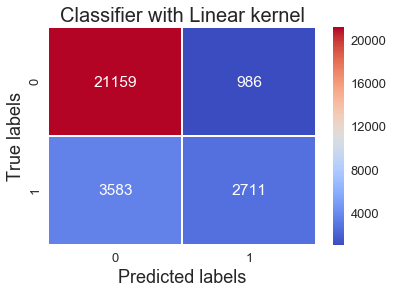

In [5]:
#Evaluation

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Model F-measure:Compute the F1 score, also known as balanced F-score or F-measure
F1 = 2 * (metrics.precision_score(y_test, y_pred) * metrics.recall_score
          (y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred))
print ('F-Measure:', F1)

#Model G-mean
from imblearn.metrics import geometric_mean_score
print ('Geometric mean:', geometric_mean_score(y_test, y_pred))
print "*******************************************"
#Evaluating the results
"""Confusion matrix, precision, recall, and F1 measures 
are the most commonly used metrics for classification tasks"""
from imblearn.metrics import classification_report_imbalanced
target_names = ['class 0', 'class 1']
print(classification_report_imbalanced(y_test, y_pred,     target_names=target_names))
print "*******************************************"
#Confusion matrix using pyplot 
cm = confusion_matrix(y_test, y_pred)
sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
ax= plt.subplot()
sb.heatmap(cm, annot=True, ax = ax, cmap='coolwarm',fmt='g',linewidths=0.5 ) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=18);ax.set_ylabel('True labels', fontsize=18)
ax.set_title('Classifier with Linear kernel', fontsize=20)
#ax.xaxis.set_ticklabels(['Versicolor', 'Setosa']); ax.yaxis.set_ticklabels(['Versicolor', 'Setosa'])
#plt.savefig('Iris-Scaled-linear.png')

# get number of support vectors for each class
print "The number of support vectors for each class:" , svclassifier.n_support_ 

('Accuracy:', 0.83934034248742928)
('Precision:', 0.73329726805517992)
('Recall:', 0.43072767715284399)
('F-Measure:', 0.54268841957761993)
('Geometric mean:', 0.64152135308259062)
*******************************************
                   pre       rec       spe        f1       geo       iba       sup

    class 0       0.86      0.96      0.43      0.90      0.79      0.63     22145
    class 1       0.73      0.43      0.96      0.54      0.79      0.62      6294

avg / total       0.83      0.84      0.55      0.82      0.79      0.63     28439

*******************************************


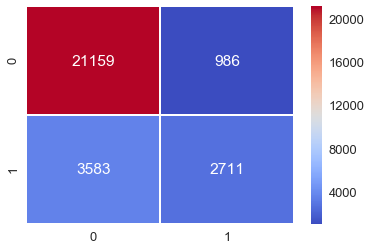

In [6]:
# Model Accuracy: how often is the classifier correct?
SVM_Linear_test_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
SVM_Linear_test_precision = metrics.precision_score(y_test, y_pred)
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
SVM_Linear_test_recall = metrics.recall_score(y_test, y_pred)
print("Recall:",metrics.recall_score(y_test, y_pred))

#Model F-measure:Compute the F1 score, also known as balanced F-score or F-measure
F1 = 2 * (metrics.precision_score(y_test, y_pred) * metrics.recall_score
          (y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred))
SVM_Linear_test_f1 = F1
print ('F-Measure:', F1)

#Model G-mean
SVM_Linear_test_Gmean  = geometric_mean_score(y_test, y_pred)
print ('Geometric mean:', geometric_mean_score(y_test, y_pred))
print "*******************************************"
#Evaluating the results
"""Confusion matrix, precision, recall, and F1 measures 
are the most commonly used metrics for classification tasks"""

target_names = ['class 0', 'class 1']
print(classification_report_imbalanced(y_test, y_pred,     target_names=target_names))
print "*******************************************"

#Confusion matrix using pyplot 
cm_SVC_linear = confusion_matrix(y_test, y_pred)
sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
ax= plt.subplot()
sb.heatmap(cm_SVC_linear, annot=True, ax = ax, cmap='coolwarm',fmt='g',linewidths=0.5 ) #annot=True to annotate cells

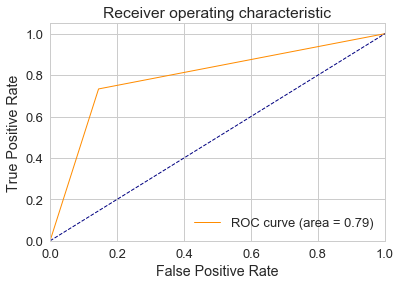

In [7]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [8]:
#Gaussian Kernel

from sklearn.svm import SVC  

svclassifier = SVC(kernel='rbf', C= 10, gamma = 0.1 )   
svclassifier.fit(X_train, y_train) 

#Making predictions
y_pred = svclassifier.predict(X_test) 


('Accuracy:', 0.84915081402299664)
('Precision:', 0.77817878956135478)
('Recall:', 0.44534477279949158)
('F-Measure:', 0.56649151172190781)
('Geometric mean:', 0.65519200580405379)
*******************************************
                   pre       rec       spe        f1       geo       iba       sup

    class 0       0.86      0.96      0.45      0.91      0.82      0.67     22145
    class 1       0.78      0.45      0.96      0.57      0.82      0.66      6294

avg / total       0.84      0.85      0.56      0.83      0.82      0.67     28439

*******************************************
The number of support vectors for each class: [20202 19152]


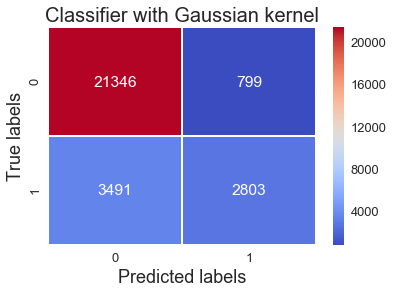

In [9]:
#Evaluation

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Model F-measure:Compute the F1 score, also known as balanced F-score or F-measure
F1 = 2 * (metrics.precision_score(y_test, y_pred) * metrics.recall_score
          (y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred))
print ('F-Measure:', F1)

#Model G-mean
from imblearn.metrics import geometric_mean_score
print ('Geometric mean:', geometric_mean_score(y_test, y_pred))
print "*******************************************"
#Evaluating the results
"""Confusion matrix, precision, recall, and F1 measures 
are the most commonly used metrics for classification tasks"""
from imblearn.metrics import classification_report_imbalanced
target_names = ['class 0', 'class 1']
print(classification_report_imbalanced(y_test, y_pred,     target_names=target_names))
print "*******************************************"
#Confusion matrix using pyplot 
cm = confusion_matrix(y_test, y_pred)
sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
ax= plt.subplot()
sb.heatmap(cm, annot=True, ax = ax, cmap='coolwarm',fmt='g',linewidths=0.5 ) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=18);ax.set_ylabel('True labels', fontsize=18)
ax.set_title('Classifier with Gaussian kernel', fontsize=20)
#ax.xaxis.set_ticklabels(['Versicolor', 'Setosa']); ax.yaxis.set_ticklabels(['Versicolor', 'Setosa'])
#plt.savefig('Iris-scaled-Gaussian.png')

# get number of support vectors for each class
print "The number of support vectors for each class:" , svclassifier.n_support_ 

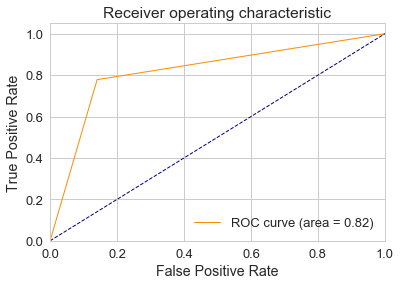

In [10]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

('Accuracy:', 0.84915081402299664)
('Precision:', 0.77817878956135478)
('Recall:', 0.44534477279949158)
('F-Measure:', 0.56649151172190781)
('Geometric mean:', 0.65519200580405379)
*******************************************
                   pre       rec       spe        f1       geo       iba       sup

    class 0       0.86      0.96      0.45      0.91      0.82      0.67     22145
    class 1       0.78      0.45      0.96      0.57      0.82      0.66      6294

avg / total       0.84      0.85      0.56      0.83      0.82      0.67     28439

*******************************************


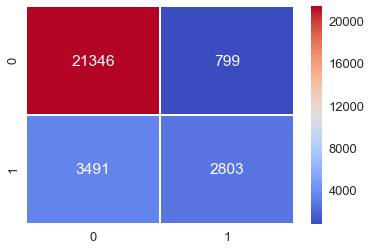

In [11]:
# Model Accuracy: how often is the classifier correct?
SVM_RBF_test_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
SVM_RBF_test_precision = metrics.precision_score(y_test, y_pred)
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
SVM_RBF_test_recall = metrics.recall_score(y_test, y_pred)
print("Recall:",metrics.recall_score(y_test, y_pred))

#Model F-measure:Compute the F1 score, also known as balanced F-score or F-measure
F1 = 2 * (metrics.precision_score(y_test, y_pred) * metrics.recall_score
          (y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred))
SVM_RBF_test_f1 = F1
print ('F-Measure:', F1)

#Model G-mean
SVM_RBF_test_Gmean = geometric_mean_score(y_test, y_pred)
print ('Geometric mean:', geometric_mean_score(y_test, y_pred))
print "*******************************************"
#Evaluating the results
"""Confusion matrix, precision, recall, and F1 measures  
are the most commonly used metrics for classification tasks"""

target_names = ['class 0', 'class 1']
print(classification_report_imbalanced(y_test, y_pred,     target_names=target_names))
print "*******************************************"

#Confusion matrix using pyplot 
cm_SVC_RBF = confusion_matrix(y_test, y_pred)
sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
ax= plt.subplot()
sb.heatmap(cm_SVC_RBF, annot=True, ax = ax, cmap='coolwarm',fmt='g',linewidths=0.5 ) #annot=True to annotate cells

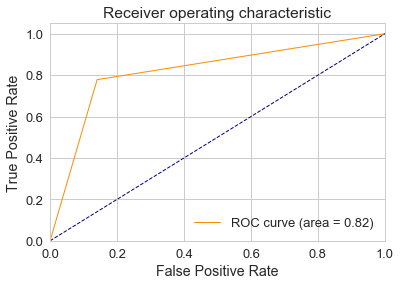

In [12]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [13]:
#Polynomial Kernel , degree = 2
"""In the case of polynomial kernel, you also have to 
pass a value for the degree parameter of the SVC class.
This basically is the degree of the polynomial."""

from sklearn.svm import SVC  

svclassifier = SVC(kernel='poly', degree=2,  C= 10)  
svclassifier.fit(X_train, y_train) 

#Making predictions
y_pred = svclassifier.predict(X_test) 

('Accuracy:', 0.80382573226906717)
('Precision:', 0.83505154639175261)
('Recall:', 0.1415633937082936)
('F-Measure:', 0.24208667300638498)
('Geometric mean:', 0.37475098657137107)
*******************************************
                   pre       rec       spe        f1       geo       iba       sup

    class 0       0.80      0.99      0.14      0.89      0.82      0.67     22145
    class 1       0.84      0.14      0.99      0.24      0.82      0.67      6294

avg / total       0.81      0.80      0.33      0.74      0.82      0.67     28439

*******************************************
The number of support vectors for each class: [24775 24741]


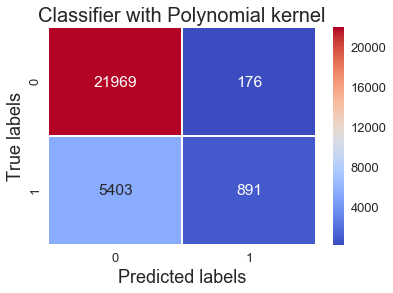

In [14]:
#Evaluation

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Model F-measure:Compute the F1 score, also known as balanced F-score or F-measure
F1 = 2 * (metrics.precision_score(y_test, y_pred) * metrics.recall_score
          (y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred))
print ('F-Measure:', F1)

#Model G-mean
from imblearn.metrics import geometric_mean_score
print ('Geometric mean:', geometric_mean_score(y_test, y_pred))
print "*******************************************"
#Evaluating the results
"""Confusion matrix, precision, recall, and F1 measures 
are the most commonly used metrics for classification tasks"""
from imblearn.metrics import classification_report_imbalanced
target_names = ['class 0', 'class 1']
print(classification_report_imbalanced(y_test, y_pred,     target_names=target_names))
print "*******************************************"
#Confusion matrix using pyplot 
cm = confusion_matrix(y_test, y_pred)
sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
ax= plt.subplot()
sb.heatmap(cm, annot=True, ax = ax, cmap='coolwarm',fmt='g',linewidths=0.5 ) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=18);ax.set_ylabel('True labels', fontsize=18)
ax.set_title('Classifier with Polynomial kernel', fontsize=20)
#ax.xaxis.set_ticklabels(['Versicolor', 'Setosa']); ax.yaxis.set_ticklabels(['Versicolor', 'Setosa'])
#plt.savefig('Iris-scaled-Poly.png')

# get number of support vectors for each class
print "The number of support vectors for each class:" , svclassifier.n_support_ 

('Accuracy:', 0.80382573226906717)
('Precision:', 0.83505154639175261)
('Recall:', 0.1415633937082936)
('F-Measure:', 0.24208667300638498)
('Geometric mean:', 0.37475098657137107)
*******************************************
                   pre       rec       spe        f1       geo       iba       sup

    class 0       0.80      0.99      0.14      0.89      0.82      0.67     22145
    class 1       0.84      0.14      0.99      0.24      0.82      0.67      6294

avg / total       0.81      0.80      0.33      0.74      0.82      0.67     28439

*******************************************


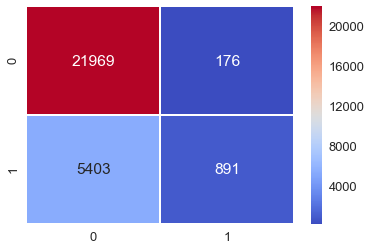

In [15]:
# Model Accuracy: how often is the classifier correct?
SVM_Poly_test_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
SVM_Poly_test_precision = metrics.precision_score(y_test, y_pred)
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
SVM_Poly_test_recall = metrics.recall_score(y_test, y_pred)
print("Recall:",metrics.recall_score(y_test, y_pred))

#Model F-measure:Compute the F1 score, also known as balanced F-score or F-measure
F1 = 2 * (metrics.precision_score(y_test, y_pred) * metrics.recall_score
          (y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred))
SVM_Poly_test_f1 = F1
print ('F-Measure:', F1)

#Model G-mean
SVM_Poly_test_Gmean = geometric_mean_score(y_test, y_pred)
print ('Geometric mean:', geometric_mean_score(y_test, y_pred))
print "*******************************************"
#Evaluating the results
"""Confusion matrix, precision, recall, and F1 measures 
are the most commonly used metrics for classification tasks"""

target_names = ['class 0', 'class 1']
print(classification_report_imbalanced(y_test, y_pred,     target_names=target_names))
print "*******************************************"

#Confusion matrix using pyplot 
cm_SVC_Poly = confusion_matrix(y_test, y_pred)
sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
ax= plt.subplot()
sb.heatmap(cm_SVC_Poly, annot=True, ax = ax, cmap='coolwarm',fmt='g',linewidths=0.5 ) #annot=True to annotate cells

In [16]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines-Linear', 'Support Vector Machines_RBF','Support Vector Machines_Poly'],

    #'Score': [lr_test_accuracy*100, SVM_Linear_test_accuracy*100, SVM_RBF_test_accuracy*100, SVM_Poly_test_accuracy*100,
     #            knn_test_accuracy*100, GaussianNB_test_accuracy*100, P_test_accuracy*100, SGT_test_accuracy*100, 
      #           dt_test_accuracy*100, rf_test_accuracy*100, nb_test_accuracy*100],
    
    'Accuracy': [SVM_Linear_test_accuracy*100, SVM_RBF_test_accuracy*100, SVM_Poly_test_accuracy*100],
    
    'Precision': [SVM_Linear_test_precision*100, SVM_RBF_test_precision*100, SVM_Poly_test_accuracy*100,],
    
    'Recall': [SVM_Linear_test_recall*100, SVM_RBF_test_recall*100, SVM_Poly_test_recall*100],

    'F_measure': [SVM_Linear_test_f1*100, SVM_RBF_test_f1*100,SVM_Poly_test_f1*100],
    
    'G-mean': [SVM_Linear_test_Gmean*100, SVM_RBF_test_Gmean*100, SVM_Poly_test_Gmean*100,]})

models.sort_values(by='Accuracy', ascending=True).set_index('Model')

,Accuracy,F_measure,G-mean,Precision,Recall
Model,,,,,
Support Vector Machines_Poly,80.382573,24.208667,37.475099,80.382573,14.156339
Support Vector Machines-Linear,83.934034,54.268842,64.152135,73.329727,43.072768
Support Vector Machines_RBF,84.915081,56.649151,65.519201,77.817879,44.534477


In [17]:
import plotly 
plotly.tools.set_credentials_file(username='elaheh.jafarigol', api_key='H7Q5lxLC8c1RIKLcRn5T')

In [20]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.plotly import iplot

#plotly.offline.init_notebook_mode()
#py.iplot(fig, filename="file.html")


"""#import plotly.graph_objs as go
import plotly.offline as py
py.iplot(fig)

from plotly.plotly import iplot
plotly.offline.init_notebook_mode()
py.iplot(fig, filename="file.html")"""


# create trace1 
trace1 = go.Bar(
         x = np.array("SVM with Linear kernel"),
         y = np.array(SVM_Linear_test_accuracy),
         name = "SVM",
         marker = dict(color ='rgba(255,99,71)',
         line=dict(color='rgb(0,0,0)',width=1.5))
                    )         

# create trace3 
trace2 = go.Bar(
         x = np.array("SVM with RBF kernel"),
         y = np.array(SVM_RBF_test_accuracy),
         name = "SVM",
         marker = dict(color ='rgba(255,127,80)',
         line=dict(color='rgb(0,0,0)',width=1.5))
                    )
    
# create trace4 
trace3 = go.Bar(
         x = np.array("SVM with Polynomial kernel"),
         y = np.array(SVM_Poly_test_accuracy),
         name = "SVM",
         marker = dict(color ='rgba(255,127,80)',
         line=dict(color='rgb(0,0,0)',width=1.5))
                    )


data = [trace1,trace2,trace3]
layout = go.Layout(barmode = "group",title="Machine Learning Classification Models Comparison")
fig = go.Figure(data = data, layout = layout)
iplot(fig)